Adjacency Matrix:
[[0 1 1 0 1]
 [1 0 1 1 0]
 [1 1 0 1 1]
 [0 1 1 0 1]
 [1 0 1 1 0]]
Maximum Cut Size: 6
Partition Set A: {0, 3}
Partition Set B: {1, 2, 4}


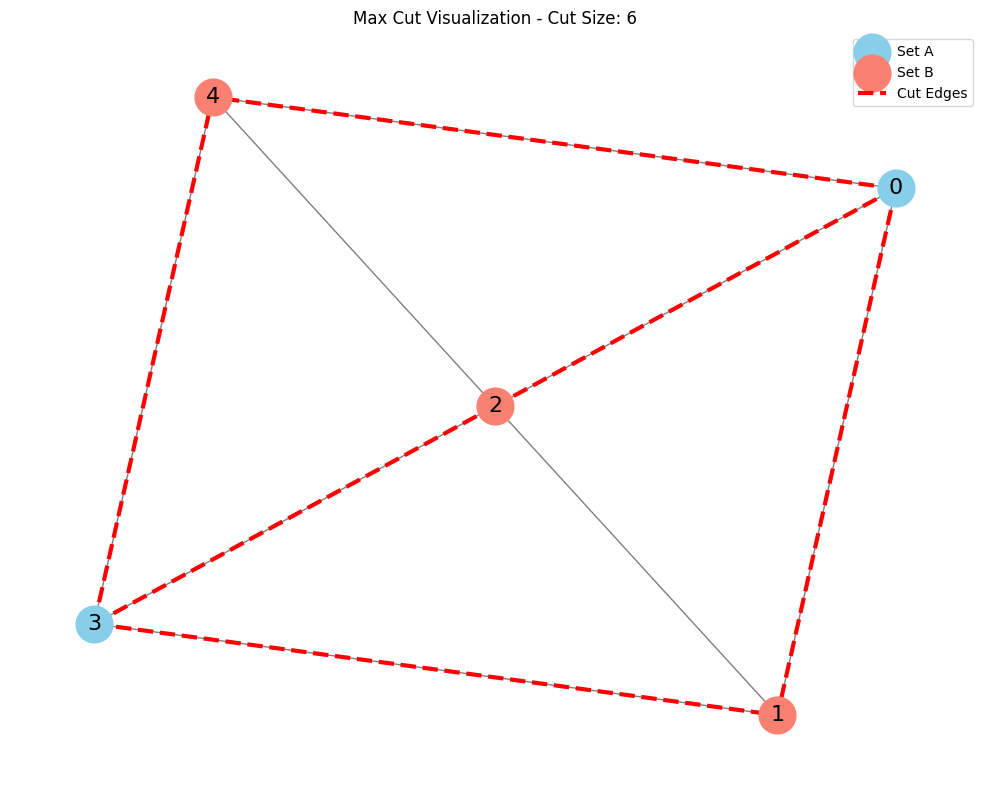

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations

# Create a simple unweighted graph with 5 nodes
# 1 represents an edge between nodes, 0 represents no edge
adjacency_matrix = np.array([
    [0, 1, 1, 0, 1],  # Node 0 connected to nodes 1, 2, 4
    [1, 0, 1, 1, 0],  # Node 1 connected to nodes 0, 2, 3
    [1, 1, 0, 1, 1],  # Node 2 connected to nodes 0, 1, 3, 4
    [0, 1, 1, 0, 1],  # Node 3 connected to nodes 1, 2, 4
    [1, 0, 1, 1, 0]   # Node 4 connected to nodes 0, 2, 3
])

print("Adjacency Matrix:")
print(adjacency_matrix)

# Function to calculate cut size between two sets of nodes
def calculate_cut_size(adjacency_matrix, set_a, set_b):
    cut_size = 0
    for i in set_a:
        for j in set_b:
            cut_size += adjacency_matrix[i, j]
    return cut_size

# Find maximum cut by trying all possible partitions
def find_max_cut(adjacency_matrix):
    n = adjacency_matrix.shape[0]
    nodes = set(range(n))
    max_cut_size = 0
    max_cut_partition = None
    
    # Try all possible partitions
    for k in range(1, n):
        for set_a in combinations(range(n), k):
            set_a = set(set_a)
            set_b = nodes - set_a
            
            cut_size = calculate_cut_size(adjacency_matrix, set_a, set_b)
            
            if cut_size > max_cut_size:
                max_cut_size = cut_size
                max_cut_partition = (set_a, set_b)
    
    return max_cut_size, max_cut_partition

# Find the maximum cut
max_cut_size, max_cut_partition = find_max_cut(adjacency_matrix)
set_a, set_b = max_cut_partition

print(f"Maximum Cut Size: {max_cut_size}")
print(f"Partition Set A: {set_a}")
print(f"Partition Set B: {set_b}")

# Visualize the graph and the max cut
def visualize_max_cut(adjacency_matrix, partition):
    set_a, set_b = partition
    G = nx.from_numpy_array(adjacency_matrix)
    
    # Position nodes using spring layout
    pos = nx.spring_layout(G, seed=42)
    
    # Draw nodes
    plt.figure(figsize=(10, 8))
    
    # Draw nodes in set A
    nx.draw_networkx_nodes(G, pos, nodelist=list(set_a), node_color='skyblue', 
                           node_size=700, label='Set A')
    
    # Draw nodes in set B
    nx.draw_networkx_nodes(G, pos, nodelist=list(set_b), node_color='salmon', 
                           node_size=700, label='Set B')
    
    # Draw all edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    
    # Draw cut edges (edges between set_a and set_b)
    cut_edges = [(i, j) for i in set_a for j in set_b if adjacency_matrix[i, j] == 1]
    nx.draw_networkx_edges(G, pos, edgelist=cut_edges, width=3.0, alpha=1.0, 
                           edge_color='red', style='dashed', label='Cut Edges')
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=16, font_family='sans-serif')
    
    plt.title(f"Max Cut Visualization - Cut Size: {max_cut_size}")
    plt.legend()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the max cut
visualize_max_cut(adjacency_matrix, max_cut_partition)